In [30]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
#import matplotlib.pyplot as plt
%pylab inline

table = pd.read_csv('Train_rev1.csv')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
descript = table.ix[:100,2]

In [9]:
import re
POS = {}
token = []
for i in descript:
    i = re.sub(r'[^\w\s]','',i)
    words = nltk.word_tokenize(i.lower().decode('utf-8'))
    tagged = nltk.pos_tag(words)
    for (w,c) in tagged:
        if c in POS:
            POS[c] += 1
        else:
            POS[c] = 1
    token += words

## A1 

In [12]:
import operator
print sorted(POS.items(), key=operator.itemgetter(1), reverse = True)[:5]

[('NN', 6465), ('JJ', 3062), ('IN', 3013), ('DT', 2190), ('NNS', 2110)]


## A2

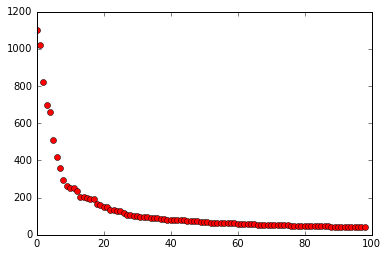

In [13]:
import operator
from collections import Counter
token_count = Counter(token)
rank = sorted(token_count.items(), key=operator.itemgetter(1), reverse = True)
top100 = [c for (w,c) in rank[:99]]
plot(top100, 'ro')

## A3

In [16]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
no_sw = [word for word in token if not word in stop_words]

ps = PorterStemmer()
stem = [ps.stem(word) for word in no_sw]

In [17]:
new_count = Counter(stem)
print new_count.most_common(10)

[(u'work', 287), (u'engin', 206), (u'experi', 203), (u'client', 190), (u'manag', 190), (u'busi', 146), (u'requir', 140), (u'develop', 128), (u'design', 125), (u'chef', 119)]


## B1

In [33]:
cutoff = np.percentile(train[['SalaryNormalized']], 75)
table['category'] = 'high'
table.ix[table.SalaryNormalized < cutoff, 'category'] = 'low'

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,category
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,low
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk,low
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk,low
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk,low
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,low
5,13179816,Engineering Systems Analyst Water Industry,Engineering Systems Analyst Water Industry Loc...,"Dorking, Surrey, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20K to 30K,25000,cv-library.co.uk,low
